In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set style for clean, professional plots
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

## Convex Function Visualisation

A function $f: K \to \mathbb{R}$ is **convex** if for any $\lambda \in [0, 1]$ and $x_1, x_2 \in K$:

$$f(\lambda x_1 + (1 - \lambda) x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2)$$

Geometrically, this means that the line segment connecting any two points on the curve lies **above** the curve itself. This property is crucial in quadratic hedging because the variance function is convex, guaranteeing a unique global minimum.

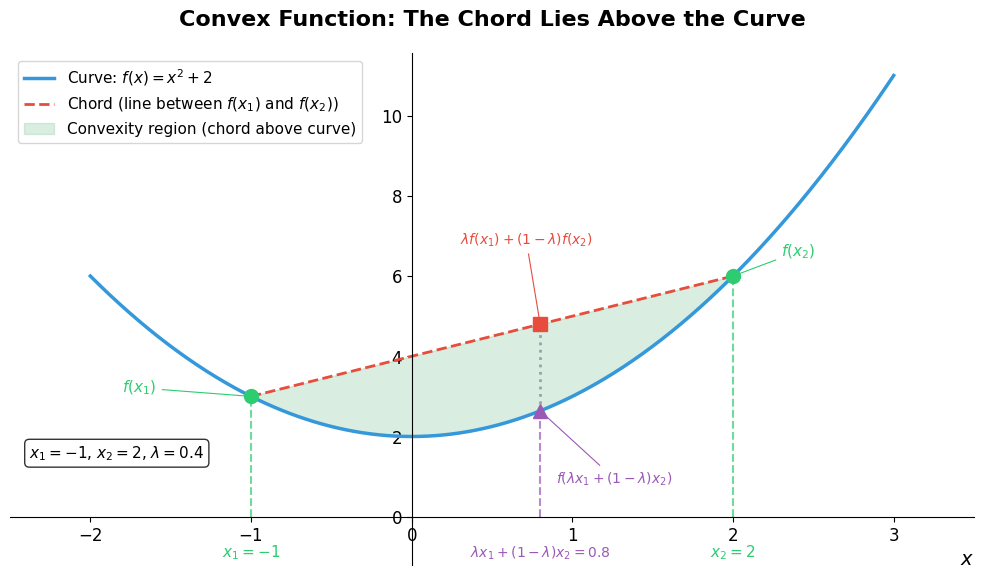

In [44]:
# Convex function demonstration
fig, ax = plt.subplots(figsize=(10, 6))

# Define convex function f(x) = x^2 + 2 (shifted up)
def f(x):
    return x**2 + 2

# Generate x values for the curve
x = np.linspace(-2, 3, 500)
y = f(x)

# Define two points x1 and x2
x1, x2 = -1.0, 2.0
y1, y2 = f(x1), f(x2)

# Lambda for convex combination (λ ∈ [0,1] is a weighting parameter)
# λ=1 gives x1, λ=0 gives x2, λ=0.5 gives midpoint
lam = 0.4
x_lambda = lam * x1 + (1 - lam) * x2  # Weighted average of x1 and x2
y_convex_combo = lam * y1 + (1 - lam) * y2  # Point on the chord
y_function = f(x_lambda)  # Point on the curve

# Plot the convex function (U-shape)
ax.plot(x, y, color="#3498db", linewidth=2.5, label=r"Curve: $f(x) = x^2 + 2$")

# Plot the chord (line connecting x1 and x2)
x_chord = np.linspace(x1, x2, 100)
y_chord = y1 + (y2 - y1) * (x_chord - x1) / (x2 - x1)
ax.plot(x_chord, y_chord, color="#e74c3c", linewidth=2, linestyle="--", 
        label=r"Chord (line between $f(x_1)$ and $f(x_2)$)")

# Mark points x1 and x2 on the curve
ax.plot(x1, y1, "o", color="#2ecc71", markersize=10, zorder=5)
ax.plot(x2, y2, "o", color="#2ecc71", markersize=10, zorder=5)

# Mark the convex combination point on the chord and on the curve
ax.plot(x_lambda, y_convex_combo, "s", color="#e74c3c", markersize=10, zorder=5)
ax.plot(x_lambda, y_function, "^", color="#9b59b6", markersize=10, zorder=5)

# Vertical line showing the gap (convexity inequality)
ax.vlines(x_lambda, y_function, y_convex_combo, color="#95a5a6", linestyle=":", linewidth=2)

# Fill between curve and chord to highlight convexity
x_fill = np.linspace(x1, x2, 100)
y_curve_fill = f(x_fill)
y_chord_fill = y1 + (y2 - y1) * (x_fill - x1) / (x2 - x1)
ax.fill_between(x_fill, y_curve_fill, y_chord_fill, color="#82c99e", alpha=0.3, 
                label="Convexity region (chord above curve)")

# Vertical dashed lines from x1 and x2 to x-axis
ax.vlines(x1, 0, y1, color="#2ecc71", linestyle="--", linewidth=1.5, alpha=0.7)
ax.vlines(x2, 0, y2, color="#2ecc71", linestyle="--", linewidth=1.5, alpha=0.7)
ax.vlines(x_lambda, 0, y_function, color="#9b59b6", linestyle="--", linewidth=1.5, alpha=0.7)

# Move axes to pass through origin (0, 0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Labels and formatting
ax.set_xlabel("$x$", fontsize=14, loc='right')
ax.set_title(r"Convex Function: The Chord Lies Above the Curve", fontsize=16, fontweight="bold", pad=20)
ax.legend(loc="upper left", fontsize=11)
ax.set_ylim(bottom=-1.2)
ax.set_xlim(-2.5, 3.5)

# Annotations for x1, x2 on x-axis with actual values
ax.annotate(r"$x_1 = -1$", xy=(x1, 0), xytext=(x1, -1), fontsize=11, ha="center", color="#2ecc71")
ax.annotate(r"$x_2 = 2$", xy=(x2, 0), xytext=(x2, -1), fontsize=11, ha="center", color="#2ecc71")

# Label for the lambda point on x-axis (where purple line meets axis)
ax.annotate(r"$\lambda x_1 + (1-\lambda)x_2 = 0.8$", xy=(x_lambda, 0), xytext=(x_lambda, -1), 
            fontsize=10, ha="center", color="#9b59b6")

# Text box showing the parameter values
textstr = r"$x_1 = -1$, $x_2 = 2$, $\lambda = 0.4$"
ax.text(0.02, 0.2, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Annotations for points on curve (green)
ax.annotate(r"$f(x_1)$", xy=(x1, y1), xytext=(x1 - 0.8, y1 + 0.1), fontsize=11, color="#2ecc71",
            arrowprops=dict(arrowstyle="-", color="#2ecc71", lw=0.8))
ax.annotate(r"$f(x_2)$", xy=(x2, y2), xytext=(x2 + 0.3, y2 + 0.5), fontsize=11, color="#2ecc71",
            arrowprops=dict(arrowstyle="-", color="#2ecc71", lw=0.8))

# Purple annotation BELOW - Point on the CURVE
ax.annotate(r"$f(\lambda x_1 + (1-\lambda)x_2)$", xy=(x_lambda, y_function), 
            xytext=(x_lambda + 0.1, y_function - 1.8), fontsize=10, color="#9b59b6",
            arrowprops=dict(arrowstyle="-", color="#9b59b6", lw=0.8))

# Red annotation ABOVE - Point on the CHORD (line)
ax.annotate(r"$\lambda f(x_1) + (1-\lambda)f(x_2)$", xy=(x_lambda, y_convex_combo), 
            xytext=(x_lambda - 0.5, y_convex_combo + 2.0), fontsize=10, color="#e74c3c",
            arrowprops=dict(arrowstyle="-", color="#e74c3c", lw=0.8))

plt.tight_layout()
plt.savefig("../../documentation/images/convex_function.png", dpi=150, bbox_inches="tight", facecolor="white")
plt.show()